In [235]:
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import aerokit.aero.Isentropic as Is
import aerokit.aero.MassFlow   as mf

plt.rcParams["figure.dpi"] = 120
print(ct.__version__)

3.0.0


In [236]:
molar_mass_CH4 = 16.04
molar_mass_O2 = 32.00
stoichiometric_ratio = molar_mass_CH4 / (2 * molar_mass_O2)

mixture_ratio = np.linspace(0,1, 100)
equivalence_ratio = mixture_ratio * stoichiometric_ratio
gas = ct.Solution('gri30.yaml')
gox = "O2:1"
methane = "CH4:1"

Adiabatic_flame_temp = np.zeros(mixture_ratio.shape)
gamma_mix = np.zeros(mixture_ratio.shape)
MW_mix = np.zeros(mixture_ratio.shape)
R = np.zeros(mixture_ratio.shape)
for i in range(len(mixture_ratio)):
    gas.TP = 300, 179908
    gas.set_equivalence_ratio(equivalence_ratio[i] , methane, gox)
    gas.equilibrate("HP") # Adiabatic since holding H constant
    Adiabatic_flame_temp[i] = gas.T
    gamma_mix[i] = gas.cp / gas.cv
    MW_mix[i] = gas.mean_molecular_weight
    R[i] = 8314.5/MW_mix[i]

Text(0.5, 1.0, 'Adibatic Flame Temperauture vs. Mixture Ratio for CH4/O2')

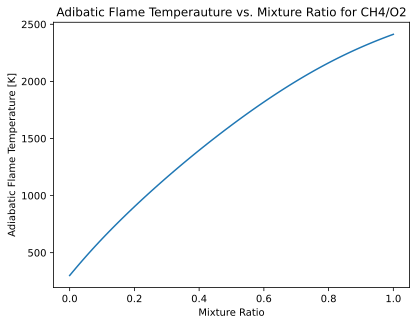

In [237]:
plt.plot(mixture_ratio, Adiabatic_flame_temp)
plt.ylabel("Adiabatic Flame Temperature [K]")
plt.xlabel("Mixture Ratio")
plt.title('Adibatic Flame Temperauture vs. Mixture Ratio for CH4/O2')

In [238]:
C_star = np.zeros(mixture_ratio.shape)
for i in range(len(mixture_ratio)): 
    C_star[i] = np.sqrt((R[i] * Adiabatic_flame_temp[i]) / gamma_mix[i]) * ((gamma_mix[i] + 1) / 2) ** ((gamma_mix[i] + 1) / (2 * (gamma_mix[i] - 1)))

Text(0.5, 1.0, 'C* vs. Mixture Ratio for CH4/O2')

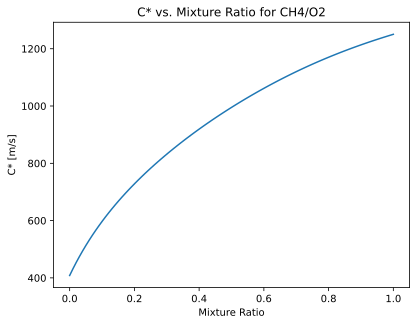

In [239]:
plt.plot(mixture_ratio, C_star)
plt.ylabel("C* [m/s]")
plt.xlabel("Mixture Ratio")
plt.title('C* vs. Mixture Ratio for CH4/O2')

In [240]:
Area_throat = 0.00500
pressure_exit = 101502.2 # pascals
pressure_atmos = 101325
mdot = 2.05323

Text(0.5, 1.0, 'Mach Number vs. Mixture Ratio for CH4/O2')

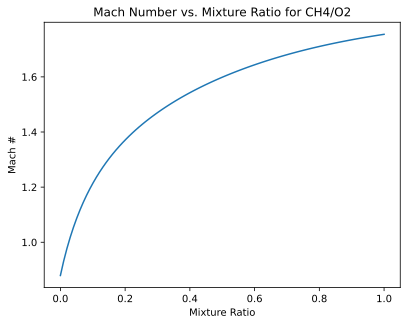

In [241]:
Pc = (C_star * mdot) / Area_throat
Mach = np.zeros(mixture_ratio.shape)
for i in range(len(C_star)):
    Mach[i] = Is.Mach_PtPs(Pc[i]/pressure_exit, gamma_mix[i])

plt.plot(mixture_ratio,Mach)
plt.ylabel("Mach #")
plt.xlabel("Mixture Ratio")
plt.title('Mach Number vs. Mixture Ratio for CH4/O2')


Using Equation 4.9 from Rocket Propulsion Textbook

Text(0.5, 1.0, 'Ae/At vs. Mixture Ratio for CH4/O2')

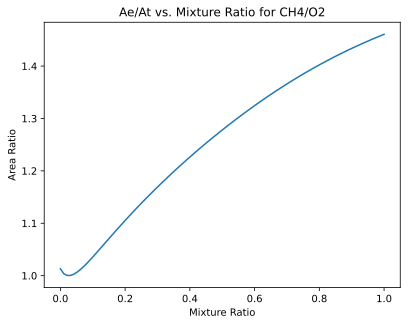

In [242]:
A_over_At = np.zeros(mixture_ratio.shape)
for i in range(len(C_star)):
    A_over_At[i] = (1/Mach[i]) * ( ( 2 + (gamma_mix[i]-1)*Mach[i]**2)/(gamma_mix[i]+1))**((gamma_mix[i]+1)/(2*(gamma_mix[i]-1)))

plt.plot(mixture_ratio,A_over_At)
plt.ylabel("Area Ratio")
plt.xlabel("Mixture Ratio")
plt.title('Ae/At vs. Mixture Ratio for CH4/O2')


Using Equation 4.33 From the textbook

Text(0.5, 0, 'Mixture Ratio')

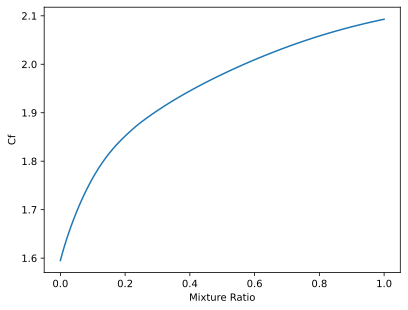

In [243]:
Cf= np.zeros(mixture_ratio.shape)
for i in range(len(C_star)):
   
    a = (2*gamma_mix[i]**2)/(gamma_mix[i]-1)
    b = ((2) / (gamma_mix[i]+1))**((gamma_mix[i]+1)/(gamma_mix[i]-1))
    c = (1 - (pressure_exit/Pc[i]))**((gamma_mix[i]-1)/gamma_mix[i])
    Cf[i] = np.sqrt(a*b*c) + (((pressure_exit/Pc[i]) - (pressure_atmos/Pc[i]))*(A_over_At[i]))


plt.plot(mixture_ratio,Cf)
plt.ylabel("Cf")
plt.xlabel("Mixture Ratio")

Text(0.5, 0, 'Mixture Ratio')

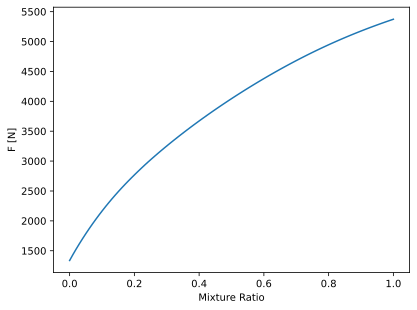

In [244]:
F= np.zeros(mixture_ratio.shape)
for i in range(len(C_star)):
    F[i] = Cf[i] * Pc[i] * Area_throat

plt.plot(mixture_ratio,F)
plt.ylabel("F [N]")
plt.xlabel("Mixture Ratio")